In [2]:
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import researchpy as rp
from pandasgui import show

ModuleNotFoundError: No module named 'pandasgui'

In [2]:
data = pd.read_excel(r'Data.xlsx', encoding = 'utf-8') 

In [3]:
show(data)

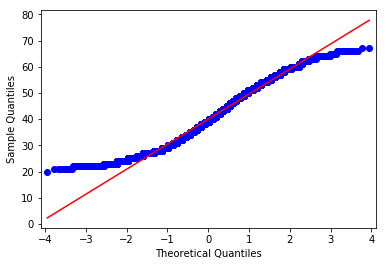

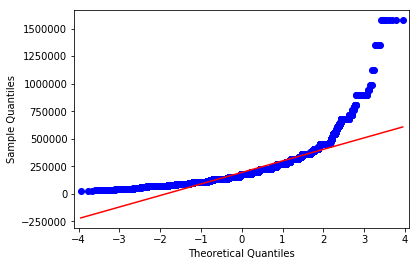

In [22]:
import statsmodels.api as sm
import pylab
sm.qqplot(data.Age, loc = 40.025662 , scale = 9.555669, line='s')
sm.qqplot(data.RevenuAnnuel, loc = 1.948339e+05 , scale = 1.045110e+05, line='s')
pylab.show()

In [5]:
sp = stats.shapiro(data.Age)
print(sp)

(0.9777772426605225, 0.0)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [6]:
sp = stats.shapiro(data.RevenuAnnuel)
print(sp)

(0.8038266897201538, 0.0)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [15]:
ks = stats.kstest(data.Age,'norm',args=(40.025662, 9.555669))
print(ks)

KstestResult(statistic=0.06495999983977713, pvalue=1.5068026470927496e-92)


In [16]:
ks = stats.kstest(data.RevenuAnnuel,'norm',args=(1.948339e+05, 1.045110e+05))
print(ks)

KstestResult(statistic=0.14591741465658625, pvalue=0.0)


In [9]:
data.shape

(25134, 16)

In [5]:
dataF=data.loc[data['Sexe']=="F",:]

In [13]:
dataF.shape

(15630, 16)

In [6]:
dataM=data.loc[data['Sexe']=="M",:]

In [16]:
dataM.shape

(9504, 16)

In [17]:
15630+9504

25134

In [19]:
print(stats.ttest_ind(dataF.Age,dataM.Age))

Ttest_indResult(statistic=17.206779671911317, pvalue=5.64395985454444e-66)


In [14]:
t=stats.ttest_ind(dataF.Age,dataM.Age)
print(t)

Ttest_indResult(statistic=17.206779671911317, pvalue=5.64395985454444e-66)


In [8]:
t=stats.ttest_ind(dataF.RevenuAnnuel,dataM.RevenuAnnuel)
print(t)

Ttest_indResult(statistic=-31.051533852146385, pvalue=9.144712907300364e-208)


In [13]:
t=stats.mannwhitneyu(dataF.Age,dataM.Age)
print(t)

MannwhitneyuResult(statistic=64303258.0, pvalue=8.025582018834662e-72)


In [15]:
t=stats.ttest_ind(dataF.Age,dataM.Age,equal_var='False')
print(t)

Ttest_indResult(statistic=17.206779671911317, pvalue=5.64395985454444e-66)


In [16]:
t=stats.ttest_ind(dataF.RevenuAnnuel,dataM.RevenuAnnuel,equal_var='False')
print(t)

Ttest_indResult(statistic=-31.051533852146385, pvalue=9.144712907300364e-208)


In [17]:
t=stats.mannwhitneyu(dataF.RevenuAnnuel,dataM.RevenuAnnuel)
print(t)

MannwhitneyuResult(statistic=53622803.5, pvalue=9.17650194834104e-302)


In [18]:
dataWorking=data.loc[data['SecteurActivité']=="Working",:]
dataCommercial=data.loc[data['SecteurActivité']=="Commercial associate",:]
dataState=data.loc[data['SecteurActivité']=="State servant",:]

In [21]:
print(stats.f_oneway(dataWorking.RevenuAnnuel,dataCommercial.RevenuAnnuel,dataState.RevenuAnnuel))

F_onewayResult(statistic=306.920390129821, pvalue=2.0392657703907052e-132)


In [23]:
print(stats.kruskal(dataWorking.RevenuAnnuel,dataCommercial.RevenuAnnuel,dataState.RevenuAnnuel))

KruskalResult(statistic=585.3688839921708, pvalue=7.740373228321589e-128)


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/difficile.csv")

In [24]:
df.head()

,dose,libido
0,placebo,3
1,placebo,2
2,placebo,1
3,placebo,1
4,placebo,4


In [5]:
df.drop('person', axis= 1, inplace= True)

In [7]:
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)

In [58]:
data1=data
# Get names of indexes for which column SecteurActivité has value Pensioner
indexNames1 = data1[ data1['SecteurActivité'] == 'Pensioner' ].index
# Get names of indexes for which column SecteurActivité has value Student
indexNames2 = data1[ data1['SecteurActivité'] == 'Student' ].index
# Delete these row indexes from dataFrame
data1.drop(indexNames1 , inplace=True)
data1.drop(indexNames2 , inplace=True)
rp.summary_cont(data1['RevenuAnnuel'].groupby(data1['SecteurActivité']))

,N,Mean,SD,SE,95% Conf.,Interval
SecteurActivité,,,,,,
Commercial associate,7052,218450.5927,124112.9440,1477.9540,215553.3587,221347.8267
State servant,2437,205066.7099,118450.1358,2399.4284,200361.5788,209771.8410
Working,15622,182547.1688,89451.0394,715.6770,181144.3589,183949.9787


In [59]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('RevenuAnnuel ~ C(SecteurActivité)', data=data1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(SecteurActivité),6.546767e+12,2.0,306.92039,2.039266e-132
Residual,2.677832e+14,25108.0,NaN,NaN


In [50]:
rp.summary_cont(data['RevenuAnnuel'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,RevenuAnnuel,25134.0,194833.8515,104510.9872,659.2212,193541.7395,196125.9634


In [51]:
rp.summary_cont(data['RevenuAnnuel'].groupby(data['SecteurActivité']))

,N,Mean,SD,SE,95% Conf.,Interval
SecteurActivité,,,,,,
Commercial associate,7052,218450.5927,124112.9440,1477.9540,215553.3587,221347.8267
Pensioner,13,257538.4615,98832.0253,27411.0719,197814.8664,317262.0567
State servant,2437,205066.7099,118450.1358,2399.4284,200361.5788,209771.8410
Student,10,159300.0000,24665.7657,7800.0000,141655.1741,176944.8259
Working,15622,182547.1688,89451.0394,715.6770,181144.3589,183949.9787


In [52]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('RevenuAnnuel ~ C(SecteurActivité)', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(SecteurActivité),6.610516e+12,4.0,155.013097,2.977758e-131
Residual,2.679058e+14,25129.0,NaN,NaN


In [18]:
rp.summary_cont(data['Age'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Age,25134.0,40.0257,9.5557,0.0603,39.9075,40.1438


In [19]:
rp.summary_cont(data['Age'].groupby(data['Sexe']))

,N,Mean,SD,SE,95% Conf.,Interval
Sexe,,,,,,
F,15630,40.8297,9.2904,0.0743,40.6840,40.9753
M,9504,38.7034,9.8352,0.1009,38.5056,38.9011


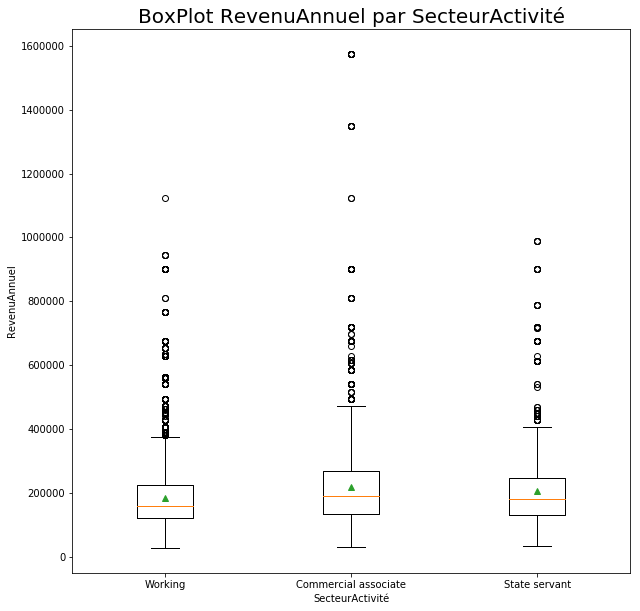

In [46]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("BoxPlot RevenuAnnuel par SecteurActivité", fontsize= 20)
ax.set

data = [data['RevenuAnnuel'][data['SecteurActivité'] == 'Working'],
        data['RevenuAnnuel'][data['SecteurActivité'] == 'Commercial associate'],
        data['RevenuAnnuel'][data['SecteurActivité'] == 'State servant']]

ax.boxplot(data,
           labels= ['Working', 'Commercial associate' , 'State servant'],
           showmeans= True)

plt.xlabel("SecteurActivité")
plt.ylabel("RevenuAnnuel")

plt.show()

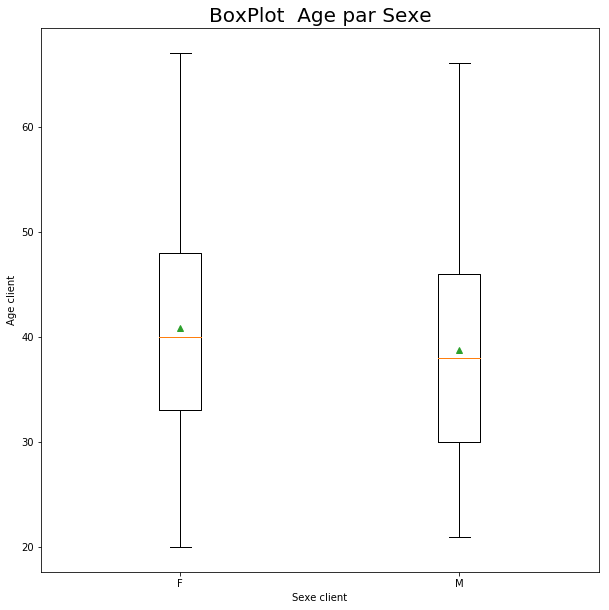

In [30]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("BoxPlot  Age par Sexe", fontsize= 20)
ax.set

data = [data['Age'][data['Sexe'] == 'F'],
        data['Age'][data['Sexe'] == 'M']]

ax.boxplot(data,
           labels= ['F', 'M'],
           showmeans= True)

plt.xlabel("Sexe client")
plt.ylabel("Age client")

plt.show()

In [6]:
X=data[['Sexe','Motorisé','PropriétaireImmobilier','NombreEnfants','RevenuAnnuel','SecteurActivité',
        'NiveauEducation','EtatCivil','TypeLogement','CategorieEmploi','MembreFamille','Age','Experience','target']]
# X=sm.add_constant(X)
# y=data['target']
X.head()

,Sexe,Motorisé,PropriétaireImmobilier,NombreEnfants,RevenuAnnuel,SecteurActivité,NiveauEducation,EtatCivil,TypeLogement,CategorieEmploi,MembreFamille,Age,Experience,target
0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2,58,3,0
1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1,52,8,0


In [7]:
sex = pd.get_dummies(X['Sexe'],drop_first=True)
motor = pd.get_dummies(X['Motorisé'],drop_first=True)
propr = pd.get_dummies(X['PropriétaireImmobilier'],drop_first=True)
secteur = pd.get_dummies(X['SecteurActivité'],drop_first=True)
niveau = pd.get_dummies(X['NiveauEducation'],drop_first=True)
etat = pd.get_dummies(X['EtatCivil'],drop_first=True)
logement = pd.get_dummies(X['TypeLogement'],drop_first=True)
categorie = pd.get_dummies(X['CategorieEmploi'],drop_first=True)
X.drop(['Sexe','Motorisé','PropriétaireImmobilier','SecteurActivité','NiveauEducation','EtatCivil','TypeLogement','CategorieEmploi'],axis=1,inplace=True)
X = pd.concat([X,sex,motor,propr,secteur,niveau,etat,logement,categorie],axis=1)
X.head()

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,NombreEnfants,RevenuAnnuel,MembreFamille,Age,Experience,target,M,Y,Y,Pensioner,...,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Sales staff,Security staff
0,0,112500.0,2,58,3,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,270000.0,1,52,8,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,0,270000.0,1,52,8,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3,0,270000.0,1,52,8,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4,0,270000.0,1,52,8,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


# Regression Logistique

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X.drop('target',axis=1), 
                                                    X['target'], test_size=0.30, 
                                                    random_state=101)

In [10]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [11]:
predictions = logmodel.predict(X_test)

In [30]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [32]:
# rapport de prédiction
print(classification_report(y_test,predictions))
# AUC
print('logit_roc_auc : ',roc_auc_score(y_test, logmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7396
           1       0.00      0.00      0.00       145

    accuracy                           0.98      7541
   macro avg       0.49      0.50      0.50      7541
weighted avg       0.96      0.98      0.97      7541

logit_roc_auc :  0.5


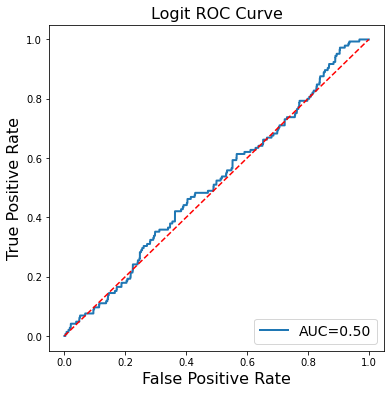

In [19]:
logit_roc_auc=roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr,thresholds=roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))
# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='AUC=%.2f' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Logit ROC Curve', fontsize=16)
# afficher la légende
plt.legend(loc="lower right", fontsize=14)
# afficher l'image
plt.show()

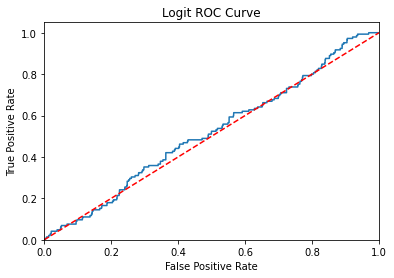

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc=roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr,thresholds=roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area= %.2f)'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logit ROC Curve')
plt.savefig('Log_ROC')
plt.show()

In [14]:
logit_roc_auc=roc_auc_score(y_test, logmodel.predict(X_test))
print(logit_roc_auc)

0.5


In [ ]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

# Arbre de Décision

In [41]:
from sklearn.tree import DecisionTreeClassifier
arbreFirst = DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=5)

In [42]:
arbreFirst.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=10)

In [43]:
predFirst = arbreFirst.predict(X_test)

[Text(165.2009809019841, 212.49818181818182, 'Pensioner <= 0.5\ngini = 0.031\nsamples = 17593\nvalue = [17316, 277]'),
 Text(164.22140697860476, 202.61454545454546, 'Y <= 0.5\ngini = 0.03\nsamples = 17586\nvalue = [17316, 270]'),
 Text(92.73570848953096, 192.73090909090908, 'Experience <= 4.5\ngini = 0.043\nsamples = 6144\nvalue = [6010, 134]'),
 Text(74.20750777178385, 182.84727272727272, 'Widow <= 0.5\ngini = 0.058\nsamples = 2936\nvalue = [2849, 87]'),
 Text(65.64101901801226, 172.96363636363637, 'Incomplete higher <= 0.5\ngini = 0.054\nsamples = 2868\nvalue = [2788, 80]'),
 Text(51.446763280607115, 163.07999999999998, 'RevenuAnnuel <= 353250.0\ngini = 0.049\nsamples = 2725\nvalue = [2656, 69]'),
 Text(33.83356496296974, 153.19636363636363, 'Age <= 25.5\ngini = 0.044\nsamples = 2543\nvalue = [2486, 57]'),
 Text(32.85399103959038, 143.31272727272727, 'gini = 0.0\nsamples = 230\nvalue = [230, 0]'),
 Text(34.813138886349094, 143.31272727272727, 'M <= 0.5\ngini = 0.048\nsamples = 2313\n

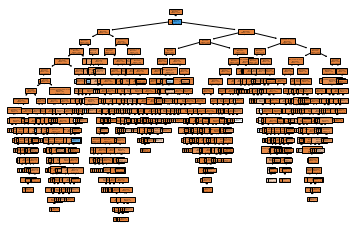

In [44]:
from sklearn.tree import plot_tree
plot_tree(arbreFirst,feature_names = list(X_train.columns),filled=True)
# list(X_train.columns)

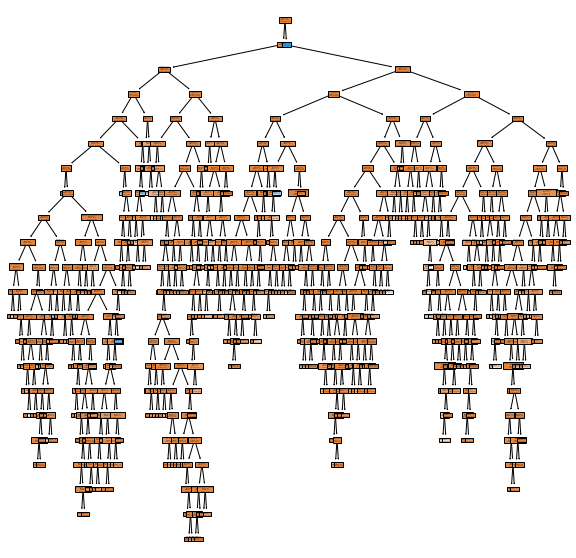

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(arbreFirst,feature_names = list(X_train.columns),filled=True)
plt.show()

In [47]:
from sklearn.tree import export_text
tree_rules = export_text(arbreFirst,feature_names = list(X_train.columns),show_weights=True)

In [51]:
print(np.unique(predFirst,return_counts=True))
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predFirst))
# Accuracy
print(metrics.accuracy_score(y_test,predFirst))
# Sensibilité 
print(metrics.recall_score(y_test,predFirst))
# précision
print(metrics.precision_score(y_test,predFirst))
# F1-score
print(metrics.f1_score(y_test,predFirst))
# rapport de prédiction
print(classification_report(y_test,predFirst))
# AUC
print('Arbre_roc_auc : ',roc_auc_score(y_test, arbreFirst.predict(X_test)))

(array([0, 1], dtype=int64), array([7517,   24], dtype=int64))
[[7383   13]
 [ 134   11]]
0.980506564116165
0.07586206896551724
0.4583333333333333
0.1301775147928994
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7396
           1       0.46      0.08      0.13       145

    accuracy                           0.98      7541
   macro avg       0.72      0.54      0.56      7541
weighted avg       0.97      0.98      0.97      7541

Arbre_roc_auc :  0.5370521810484699


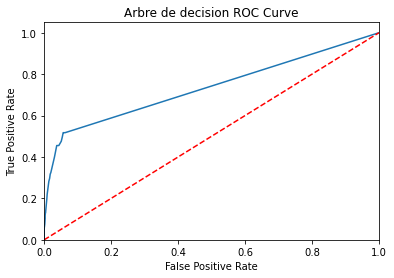

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc=roc_auc_score(y_test, arbreFirst.predict(X_test))
fpr, tpr,thresholds=roc_curve(y_test, arbreFirst.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area= %0.2f)'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Arbre de decision ROC Curve')
plt.savefig('Log_ROC')
plt.show()

In [149]:
logit_roc_auc=roc_auc_score(y_test, arbreFirst.predict(X_test))
print(logit_roc_auc)

0.5064909270621585


# K-Nears-Neighbors

In [34]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
pred = knn.predict(X_test)

In [40]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,pred))
print(knn.score(X_test, y_test))
# Accuracy
print(metrics.accuracy_score(y_test,pred))
# Sensibilité 
print(metrics.recall_score(y_test,pred))
# précision
print(metrics.precision_score(y_test,pred))
# F1-score
print(metrics.f1_score(y_test,pred))
### rapport de prédiction
############# print(metrics.classification_report(y_test,pred))
# rapport de prédiction
print(classification_report(y_test,pred))
# AUC
print('knn_roc_auc : ',roc_auc_score(y_test, knn.predict(X_test)))

[[7368   28]
 [ 124   21]]
0.980771780930911
0.9798435220792998
0.14482758620689656
0.42857142857142855
0.21649484536082475
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7396
           1       0.43      0.14      0.22       145

    accuracy                           0.98      7541
   macro avg       0.71      0.57      0.60      7541
weighted avg       0.97      0.98      0.97      7541

knn_roc_auc :  0.5


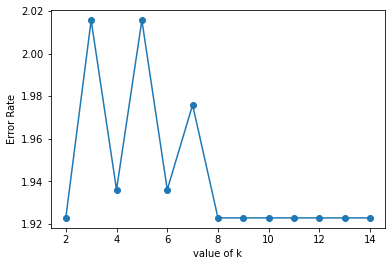

In [39]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.xlabel('value of k')
plt.ylabel('Error Rate')
plt.show()

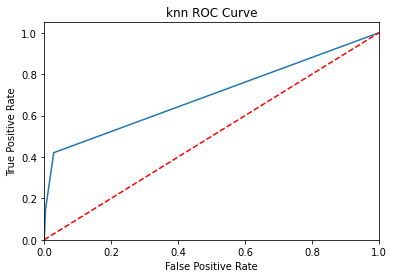

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc=roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr,thresholds=roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area= %0.2f)'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('knn ROC Curve')
plt.savefig('Log_ROC')
plt.show()

In [37]:
knn_roc_auc=roc_auc_score(y_test, knn.predict(X_test))
print(knn_roc_auc)

0.5705208780142108


# Support Vector Machines (SVM)

In [58]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# print(X_train)

In [59]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [60]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [61]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[7396,    0],
       [ 139,    6]], dtype=int64)

In [62]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
# AUC
print('svm_roc_auc : ',roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7396
           1       1.00      0.04      0.08       145

    accuracy                           0.98      7541
   macro avg       0.99      0.52      0.54      7541
weighted avg       0.98      0.98      0.97      7541

svm_roc_auc :  0.5206896551724138


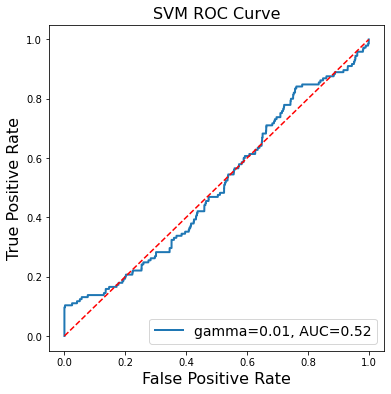

In [64]:
# prédire sur le jeu de test
y_test_pred = classifier.decision_function(X_test)
# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_test_pred ) # y_pred )
# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)
# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))
# afficher la courbe ROC
##### plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % 0.52)
plt.plot([0,1],[0,1],'r--')
# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)
# afficher la légende
plt.legend(loc="lower right", fontsize=14)
# afficher l'image
plt.show()

In [ ]:
# choisir 6 valeurs pour C, entre 1e-2 et 1e3
C_range = np.logspace(-2, 3, 6)
# choisir 4 valeurs pour gamma, entre 1e-2 et 10
gamma_range = np.logspace(-2, 1, 4)
# grille de paramètres
param_grid = {'C': C_range, 'gamma': gamma_range}
# critère de sélection du meilleur modèle
score = 'roc_auc'
# initialiser une recherche sur grille
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, 
                                    cv=5, # 5 folds de validation croisée  
                                    scoring=score)
# faire tourner la recherche sur grille
grid.fit(X_train, y_train)
# afficher les paramètres optimaux
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_, grid.best_score_))

# Neural Network

In [65]:
#initialisation du classifieur
from sklearn.neural_network import MLPClassifier
rna = MLPClassifier(hidden_layer_sizes=(2,),activation="logistic",solver="lbfgs")

In [66]:
#apprentissage
rna.fit(X_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), solver='lbfgs')

In [67]:
#affichage des coefficients
print(rna.coefs_)
print(rna.intercepts_)

[array([[ 1.10017205, -7.67918685],
       [-1.38662454,  0.83660535],
       [ 4.69430191,  0.1673448 ],
       [-0.55744553,  0.36843162],
       [ 1.97070073,  2.8299129 ],
       [-1.26771606, -0.45083273],
       [-0.88773083,  2.49686922],
       [-1.13580263,  3.61329639],
       [-0.4624856 , -1.98384153],
       [ 3.08628544, -1.53087035],
       [ 0.46510974,  0.13958078],
       [-4.30084555,  5.74401696],
       [ 0.70683149, -1.30103377],
       [-0.32762733,  0.27171586],
       [-2.88608289,  2.01482711],
       [-0.48908254,  0.69093304],
       [ 0.67135056, -1.09460876],
       [ 2.8505732 , -1.44379089],
       [ 1.77224376, -1.07036465],
       [ 1.4417475 , -1.63998253],
       [-0.56511608,  0.73637277],
       [-0.24758972, -0.60071235],
       [ 0.62434735, -1.11737291],
       [ 0.52479197, -0.12356513],
       [ 1.35260291, -2.58440164],
       [ 0.22850301,  0.08996356],
       [ 0.12384356,  0.15252233]]), array([[-3.42826534],
       [-3.5538983 ]])]
[array

In [50]:
#prédiction sur l'échantillon test
pred = rna.predict(X_test)
print(pred)
#mesure des performances
from sklearn import metrics
print(metrics.confusion_matrix(y_test,pred))
print(metrics.accuracy_score(y_test,pred))
print("Taux erreur = " + str(1-metrics.accuracy_score(y_test,pred)))

[0 0 0 ... 0 0 0]
[[7396    0]
 [ 145    0]]
0.980771780930911
Taux erreur = 0.019228219069089003


In [69]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,pred))
print(rna.score(X_test, y_test))
# Accuracy
print(metrics.accuracy_score(y_test,pred))
# Sensibilité 
print(metrics.recall_score(y_test,pred))
# précision
print(metrics.precision_score(y_test,pred))
# F1-score
print(metrics.f1_score(y_test,pred))
# rapport de prédiction
print(classification_report(y_test,pred))
# AUC
print('Neural_Network_roc_auc : ',roc_auc_score(y_test,pred))

[[7368   28]
 [ 124   21]]
0.980771780930911
0.9798435220792998
0.14482758620689656
0.42857142857142855
0.21649484536082475
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7396
           1       0.43      0.14      0.22       145

    accuracy                           0.98      7541
   macro avg       0.71      0.57      0.60      7541
weighted avg       0.97      0.98      0.97      7541

Neural_Network_roc_auc :  0.5705208780142108


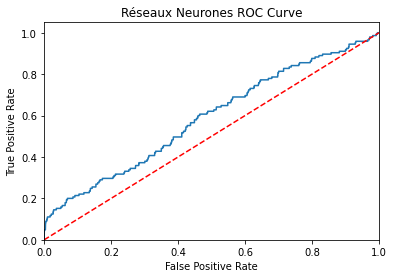

In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rna_roc_auc=roc_auc_score(y_test, rna.predict(X_test))
fpr, tpr,thresholds=roc_curve(y_test, rna.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area= %0.2f)'% rna_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Réseaux Neurones ROC Curve')
plt.savefig('Log_ROC')
plt.show()

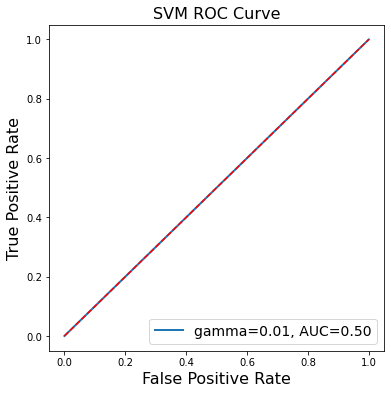

In [55]:
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, pred ) # y_pred )
# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)
# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))
# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)
plt.plot([0,1],[0,1],'r--')
# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)
# afficher la légende
plt.legend(loc="lower right", fontsize=14)
# afficher l'image
plt.show()

# Naive Bayes 

In [57]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [59]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 7541 points : 145


In [61]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))
print(gnb.score(X_test, y_test))
# Accuracy
print(metrics.accuracy_score(y_test,y_pred))
# Sensibilité 
print(metrics.recall_score(y_test,y_pred))
# précision
print(metrics.precision_score(y_test,y_pred))
# F1-score
print(metrics.f1_score(y_test,y_pred))
# rapport de prédiction
print(metrics.classification_report(y_test,y_pred))

[[7396    0]
 [ 145    0]]
0.980771780930911
0.980771780930911
0.0
0.0
0.0
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7396
           1       0.00      0.00      0.00       145

    accuracy                           0.98      7541
   macro avg       0.49      0.50      0.50      7541
weighted avg       0.96      0.98      0.97      7541



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


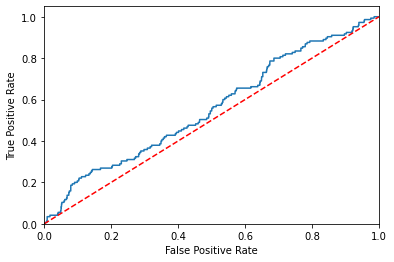

In [62]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc=roc_auc_score(y_test, gnb.predict(X_test))
fpr, tpr,thresholds=roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area= %0.2f)'% Naive_Bayes_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('Naive_Bayes_ROC')
plt.show()

In [63]:
from sklearn.model_selection import KFold, cross_val_score

In [72]:
k_fold = KFold(n_splits=5)
print(k_fold)

KFold(n_splits=5, random_state=None, shuffle=False)


In [73]:
for train_indices, test_indices in k_fold.split(X):
    print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [ 5027  5028  5029 ... 25131 25132 25133] | test: [   0    1    2 ... 5024 5025 5026]
Train: [    0     1     2 ... 25131 25132 25133] | test: [ 5027  5028  5029 ... 10051 10052 10053]
Train: [    0     1     2 ... 25131 25132 25133] | test: [10054 10055 10056 ... 15078 15079 15080]
Train: [    0     1     2 ... 25131 25132 25133] | test: [15081 15082 15083 ... 20105 20106 20107]
Train: [    0     1     2 ... 20105 20106 20107] | test: [20108 20109 20110 ... 25131 25132 25133]


In [74]:
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test])
 for train, test in k_fold.split(X_digits)]

NameError: name 'X_digits' is not defined